# Bradley University
Chance Emanuels

Cloropleth Maps

11/21/2019

In [1]:
# Import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load and view the shapefile data
fp = "IDN_adm/IDN_adm1.shp"
map_df = gpd.read_file(fp)
# Check the GeoDataframe
map_df.head()
# the column headers are called "Features"
# the Rows are called instances

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,106,IDN,Indonesia,1,Aceh,Propinsi,Autonomous Province,None,Achin|Atjeh|Nanggroe Aceh Darussalam,"MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9..."
1,106,IDN,Indonesia,2,Bali,Propinsi,Province,None,Penida|Lembongan|Ceningan|Menjangan,"MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ..."
2,106,IDN,Indonesia,3,Bangka-Belitung,Propinsi,Province,None,Babel|Kepulauan Bangka Belitung,"MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ..."
3,106,IDN,Indonesia,4,Banten,Propinsi,Province,None,None,"MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ..."
4,106,IDN,Indonesia,5,Bengkulu,Propinsi,Province,None,Bencoolen|Benkoelen|Benkulen,"MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ..."


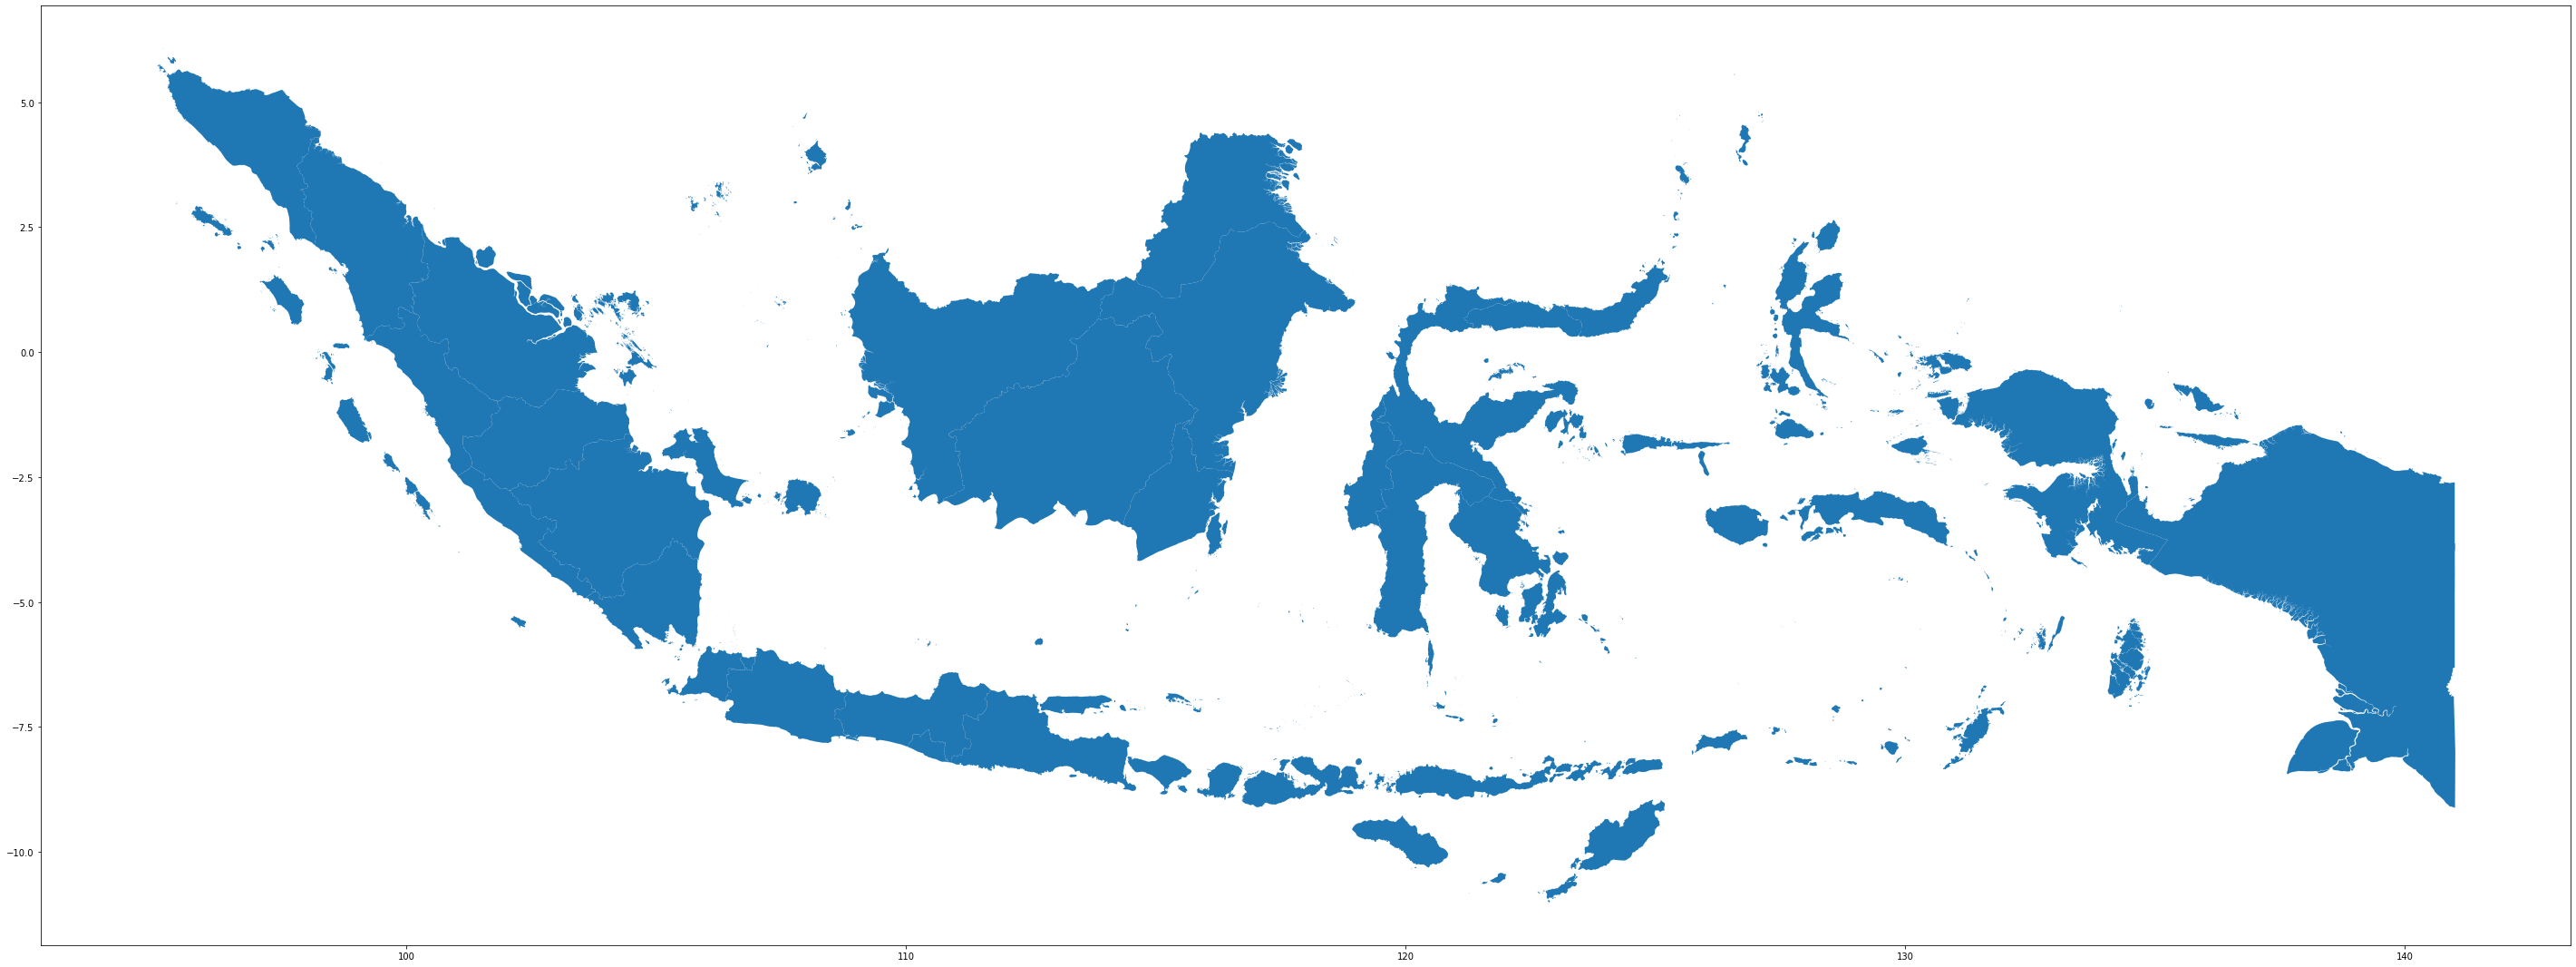

In [3]:
# Map of Indonesia 
## displaying the data
plt.rcParams['figure.figsize'] = [50, 70] # height, width
map_df.plot()

In [4]:
# Load the Province Data
province = pd.read_csv("data_province.csv", sep=";")
province.head()
# Province = region (cites is number of cities within the province)
# Population = Number of People

,province,population_2015,area_km2,population_density_per_km2,cities_regencies,cities,regencies
0,Jawa Timur,38828061,48,828,38,9,29
1,Jawa Tengah,33753023,41,894,35,6,29
2,Sumatera Utara,13923262,73,188,33,8,25
3,Papua,3143088,319,8,29,1,28
4,Jawa Barat,46668214,35,1,27,9,18


In [5]:
# Merge the Data with the shapefile and display a visualizing the map
# Join the geodataframe with the CSV dataframe
merged = map_df.merge(province, how='left', left_on="NAME_1", right_on="province")
merged = merged[['province', 'geometry', 'population_2015', 'area_km2', 'population_density_per_km2', \
                'cities_regencies', 'cities', 'regencies']]

merged.head()

,province,geometry,population_2015,area_km2,population_density_per_km2,cities_regencies,cities,regencies
0,Aceh,"MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9...",4993385.0,58.0,77.0,23.0,5,18.0
1,Bali,"MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ...",4148588.0,6.0,621.0,9.0,1,8.0
2,Bangka-Belitung,"MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ...",1370331.0,16.0,64.0,7.0,1,6.0
3,Banten,"MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ...",11934373.0,10.0,909.0,8.0,4,4.0
4,Bengkulu,"MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ...",1872136.0,20.0,84.0,10.0,1,9.0


C:\Users\Chance\Anaconda3\envs\Project2\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


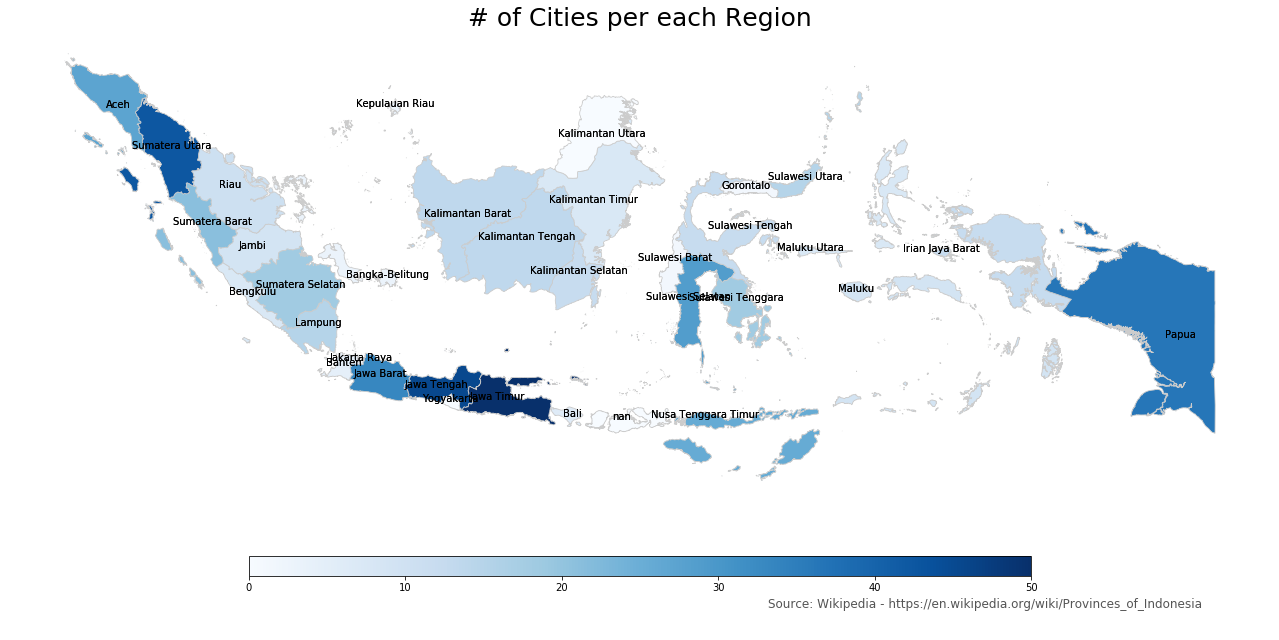

In [9]:
# Plotting the Map
# set the value column that will be visualised
variable = 'cities_regencies'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('# of Cities per each Region', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia',xy=(0.6, .05),  \
            xycoords='figure fraction', fontsize=12, \
            color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 40)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],horizontalalignment='center')
 # Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],horizontalalignment='center')

In [10]:
fig.savefig('FirstMap.png', dpi=300)